# Part I - (Prosper Loan Data Analysis)
## by (Selasi Ayittah Randy)



## Preliminary Wrangling

> The dataset containing 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Load the dataset
loan = pd.read_csv("prosperLoanData.csv")

In [3]:
loan_data = loan.copy()

In [4]:
#Shape of the dataset
loan_data.shape

(113937, 81)

In [5]:
loan_data.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [6]:
#Checking for columns with null values
loan_data.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [7]:
loan_data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [8]:
selected_columns = ['LoanOriginalAmount', 'BorrowerAPR',"ProsperScore", 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus','LoanStatus']

In [9]:
#Selected columns of interest
loan_data_cols =loan_data[selected_columns]
loan_data_cols

,LoanOriginalAmount,BorrowerAPR,ProsperScore,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,LoanStatus
0,9425,0.16516,NaN,3083.333333,36,NaN,Self-employed,Completed
1,10000,0.12016,7.0,6125.000000,36,A,Employed,Current
2,3001,0.28269,NaN,2083.333333,36,NaN,Not available,Completed
3,10000,0.12528,9.0,2875.000000,36,A,Employed,Current
4,15000,0.24614,4.0,9583.333333,36,D,Employed,Current
...,...,...,...,...,...,...,...,...
113932,10000,0.22354,5.0,4333.333333,36,C,Employed,Current
113933,2000,0.13220,8.0,8041.666667,36,A,Employed,FinalPaymentInProgress
113934,10000,0.23984,3.0,2875.000000,60,D,Employed,Current
113935,15000,0.28408,5.0,3875.000000,60,C,Full-time,Completed


In [10]:
loan_data_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LoanOriginalAmount     113937 non-null  int64  
 1   BorrowerAPR            113912 non-null  float64
 2   ProsperScore           84853 non-null   float64
 3   StatedMonthlyIncome    113937 non-null  float64
 4   Term                   113937 non-null  int64  
 5   ProsperRating (Alpha)  84853 non-null   object 
 6   EmploymentStatus       111682 non-null  object 
 7   LoanStatus             113937 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 7.0+ MB


In [11]:
#Drop rows with misssing APR
loan_data_cols=loan_data_cols[~loan_data_cols["BorrowerAPR"].isnull()]

In [12]:
loan_data_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LoanOriginalAmount     113912 non-null  int64  
 1   BorrowerAPR            113912 non-null  float64
 2   ProsperScore           84853 non-null   float64
 3   StatedMonthlyIncome    113912 non-null  float64
 4   Term                   113912 non-null  int64  
 5   ProsperRating (Alpha)  84853 non-null   object 
 6   EmploymentStatus       111682 non-null  object 
 7   LoanStatus             113912 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 7.8+ MB


### What is the structure of your dataset?

> The dataset comprises of 113937 rows  and 81 columns

### What is/are the main feature(s) of interest in your dataset?

> I am interested in finding out whuch features are best for predicting the Borrower APR for a loan

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the larger the loan the lower the APR and bprrowers with higher stated monthly income will have higher loan amount

## Univariate Exploration


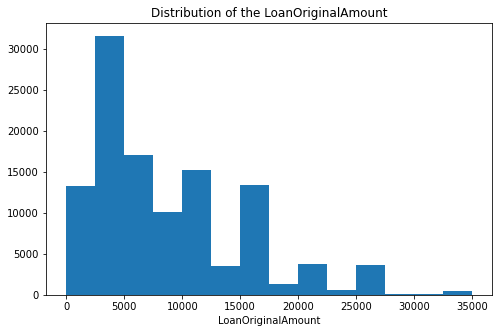

In [13]:
#Distribution of the Loan Original Amount
binsize = 2500
bins = np.arange(0, loan_data_cols['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_data_cols, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('LoanOriginalAmount')
plt.title('Distribution of the LoanOriginalAmount')
plt.show()

The distribution of the Loan Original Amount is right skewed with most borrowers given amount less than 20k

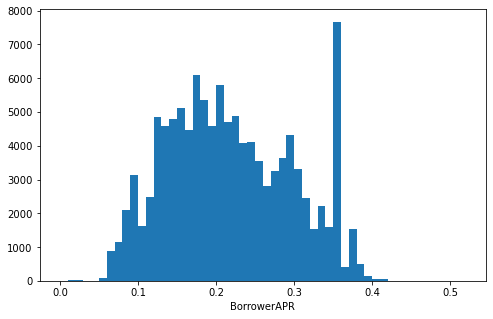

In [14]:
# start with a standard-scaled plot
binsize = 0.01
bins = np.arange(0, loan_data_cols['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_data_cols, x = 'BorrowerAPR', bins = bins)
plt.xlabel('BorrowerAPR')
plt.show()

- Most loans have a APR less than 0.43 and very few loans have APR greater than 0.43

In [15]:
# Check loans with an APR greater than 0.43
loan_data_cols[loan_data_cols.BorrowerAPR>0.43]

,LoanOriginalAmount,BorrowerAPR,ProsperScore,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,LoanStatus
18326,3000,0.45857,NaN,10000.000000,36,NaN,NaN,Defaulted
22195,1789,0.46201,NaN,2916.666667,36,NaN,NaN,Chargedoff
36018,1500,0.51229,NaN,2838.000000,36,NaN,NaN,Completed
56761,3000,0.50633,NaN,0.000000,36,NaN,NaN,Defaulted
82043,3000,0.48873,NaN,1583.333333,36,NaN,NaN,Defaulted
103973,2800,0.45857,NaN,3750.000000,36,NaN,NaN,Defaulted


- Loans with APR greater than 0.43 have no ProsperRating and ProsperScore 

In [16]:
loan_data_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LoanOriginalAmount     113912 non-null  int64  
 1   BorrowerAPR            113912 non-null  float64
 2   ProsperScore           84853 non-null   float64
 3   StatedMonthlyIncome    113912 non-null  float64
 4   Term                   113912 non-null  int64  
 5   ProsperRating (Alpha)  84853 non-null   object 
 6   EmploymentStatus       111682 non-null  object 
 7   LoanStatus             113912 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 7.8+ MB


In [17]:
#Convert the PropserRating columnt to an ordered category type
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
loan_data_cols['ProsperRating (Alpha)'] = loan_data_cols['ProsperRating (Alpha)'].astype(ordered_var)


C:\Users\SELASI\AppData\Local\Temp\ipykernel_7152\167314736.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_cols['ProsperRating (Alpha)'] = loan_data_cols['ProsperRating (Alpha)'].astype(ordered_var)


In [18]:
#Studying the Employment Status 
loan_data_cols["EmploymentStatus"].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [19]:
loan_data_cols["EmploymentStatus"].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

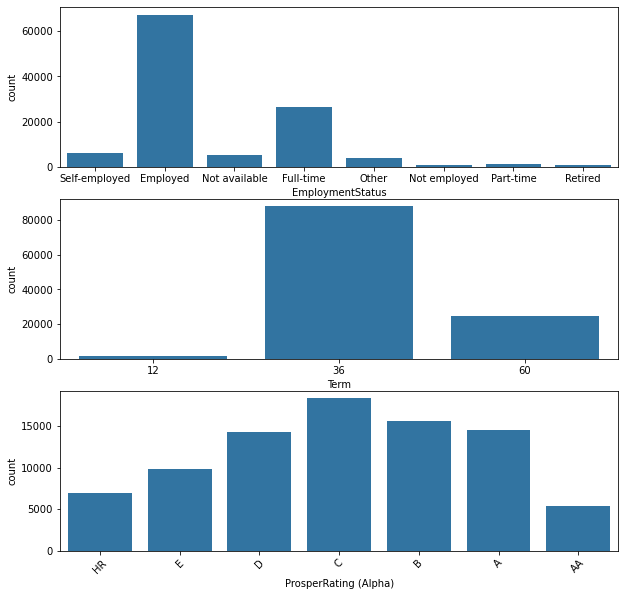

In [20]:
fig, ax = plt.subplots(nrows=3, figsize = [10,10])

default_color = sb.color_palette()[0]
sb.countplot(data = loan_data_cols, x = 'EmploymentStatus', color = default_color, ax = ax[0])
sb.countplot(data = loan_data_cols, x = 'Term', color = default_color, ax = ax[1])
sb.countplot(data = loan_data_cols, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[2])
plt.xticks(rotation=45);
plt.show()

- Most of the borrowers are employed and working full time
- Most of the loans are in terms of 36 months or 3 years
- The most ProsperRating is C followed by B

In [21]:
loan_data_cols.dtypes

LoanOriginalAmount          int64
BorrowerAPR               float64
ProsperScore              float64
StatedMonthlyIncome       float64
Term                        int64
ProsperRating (Alpha)    category
EmploymentStatus           object
LoanStatus                 object
dtype: object

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [22]:
numeric_vars = ['LoanOriginalAmount', 'BorrowerAPR',  'StatedMonthlyIncome']
categoric_vars = ['EmploymentStatus', 'ProsperRating (Alpha)','Term']

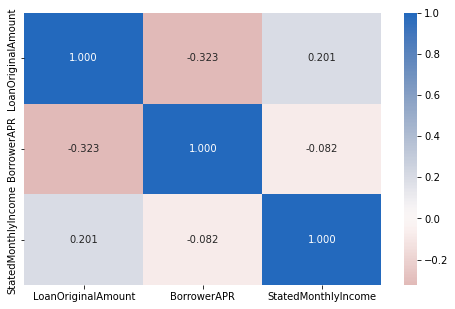

In [23]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loan_data_cols[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

diamonds_samp.shape= (500, 8)


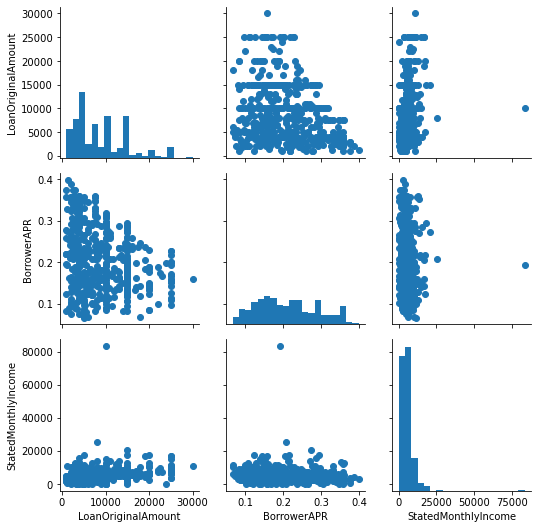

In [24]:
# plot matrix: sample 500 loans so that plots are clearer and they render faster
loan_data_cols_samp = loan_data_cols.sample(n=500, replace = False)
print("diamonds_samp.shape=",loan_data_cols_samp.shape)

g = sb.PairGrid(data = loan_data_cols_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

- The correlation  coefficient between the borrower APR and loan amount is -0.323. The scatter plots shows that the variables are negatively correlated meaning the higher the loan amount the lower the borrowers APR.
>
- There is a positive correlation between the borrowers stated monthly income and the loan original amount

<Figure size 1080x2520 with 0 Axes>

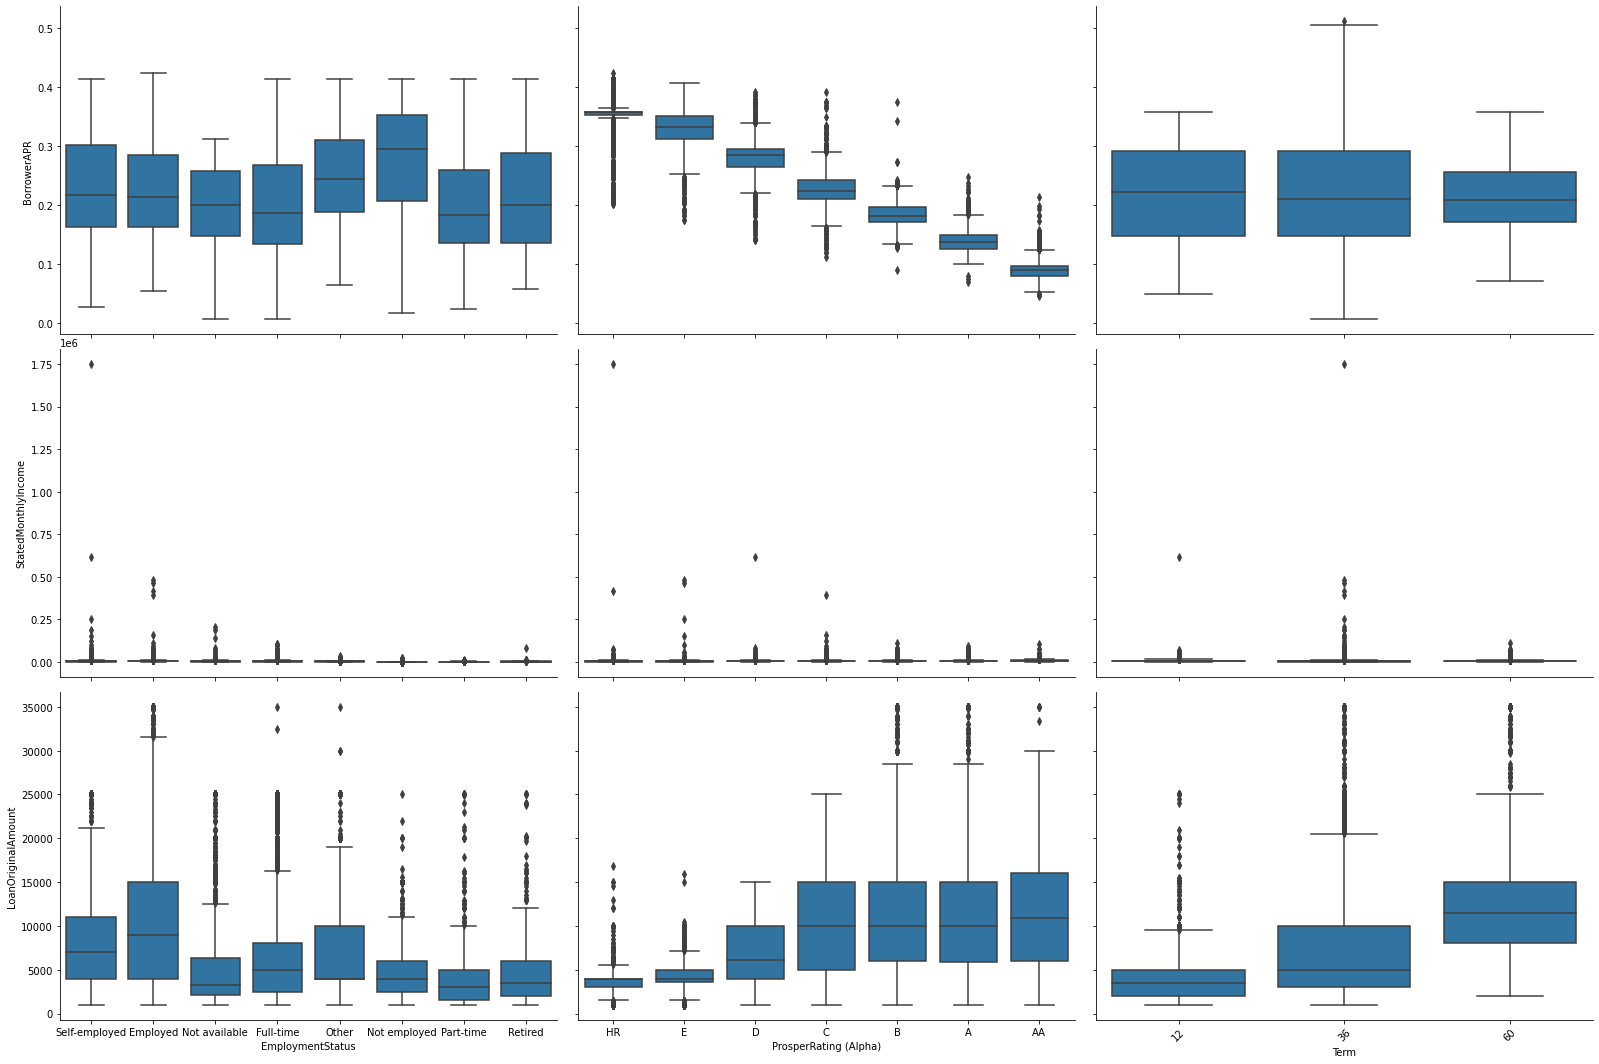

In [25]:
## plot matrix of numeric features against categorical features.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [15, 35])
g = sb.PairGrid(data = loan_data_cols, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount'], x_vars = categoric_vars,
                height = 5, aspect = 1.5)
g.map(boxgrid)
plt.xticks(rotation=45)
plt.show();

- The borrower APR decreases with better Prosper Rating(Alpha).
- Borrowers who are employed receives higher Loan original amount.
- The borrower APR decreases with increasing number of term

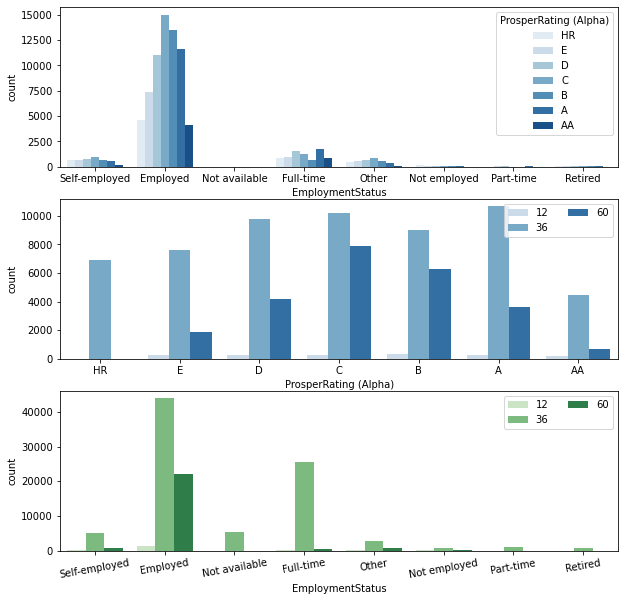

In [26]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [10, 10])
# subplot 1:  Prosper rating vs. employment status
plt.subplot(3, 1, 1)
sb.countplot(data = loan_data_cols, x ='EmploymentStatus' , hue ='ProsperRating (Alpha)' , palette = 'Blues')

# subplot 2:Prosper rating vs term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan_data_cols, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: employment status vs. term 
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan_data_cols, x = 'EmploymentStatus', hue = 'Term', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation=10);
plt.show()

 - There is an interaction between term and ProsperRating. There is only 36 months loans for HR rating borrowers
 - There is more 60 amd 36 month loans on B and C ratings

### Relationship between LoanOriginalAmount and BorrowerAPR

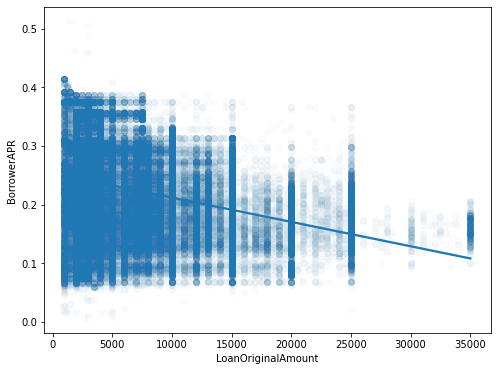

In [27]:
plt.figure(figsize = [8, 6])
sb.regplot(data = loan_data_cols, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.02});


- The borrower APR is negatively correlated with loan original amount that is the higher the loan amount the lower the APR

## Multivariate Exploration


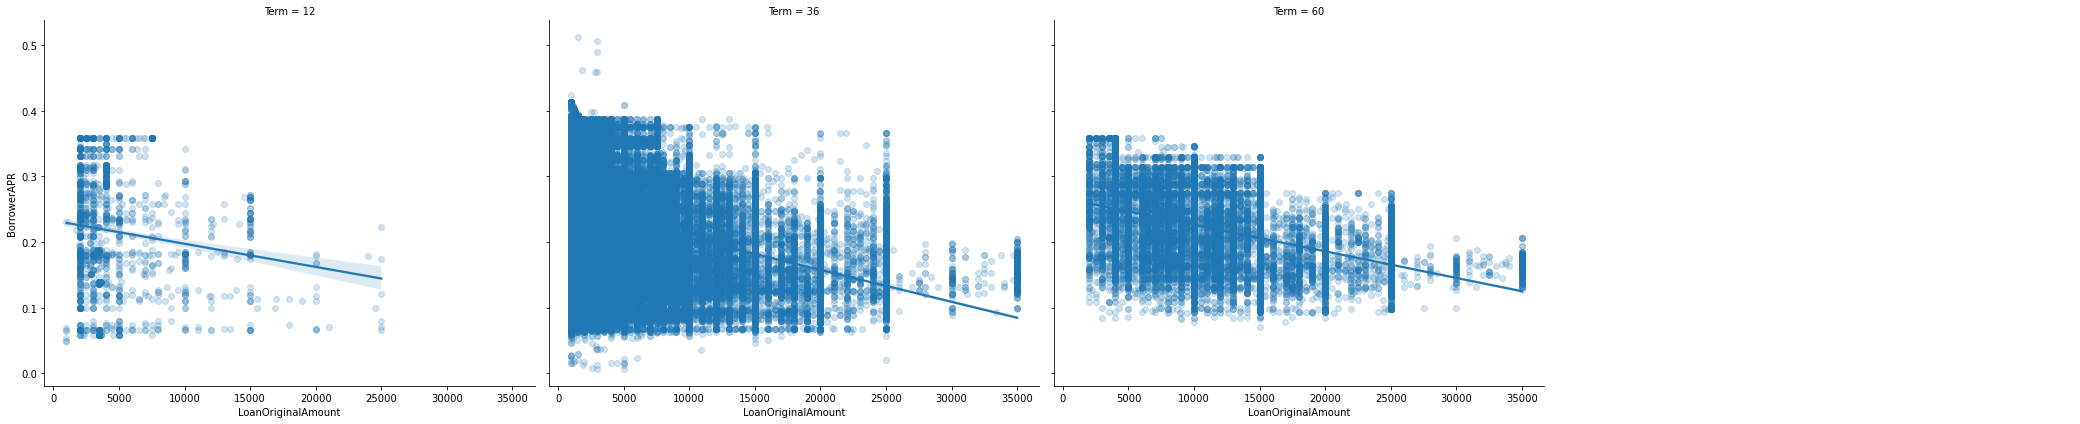

In [28]:
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loan_data_cols, aspect=1.2, height=6, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.2});
g.add_legend();

Term does not have an effect on  relationship of APR and loan amount

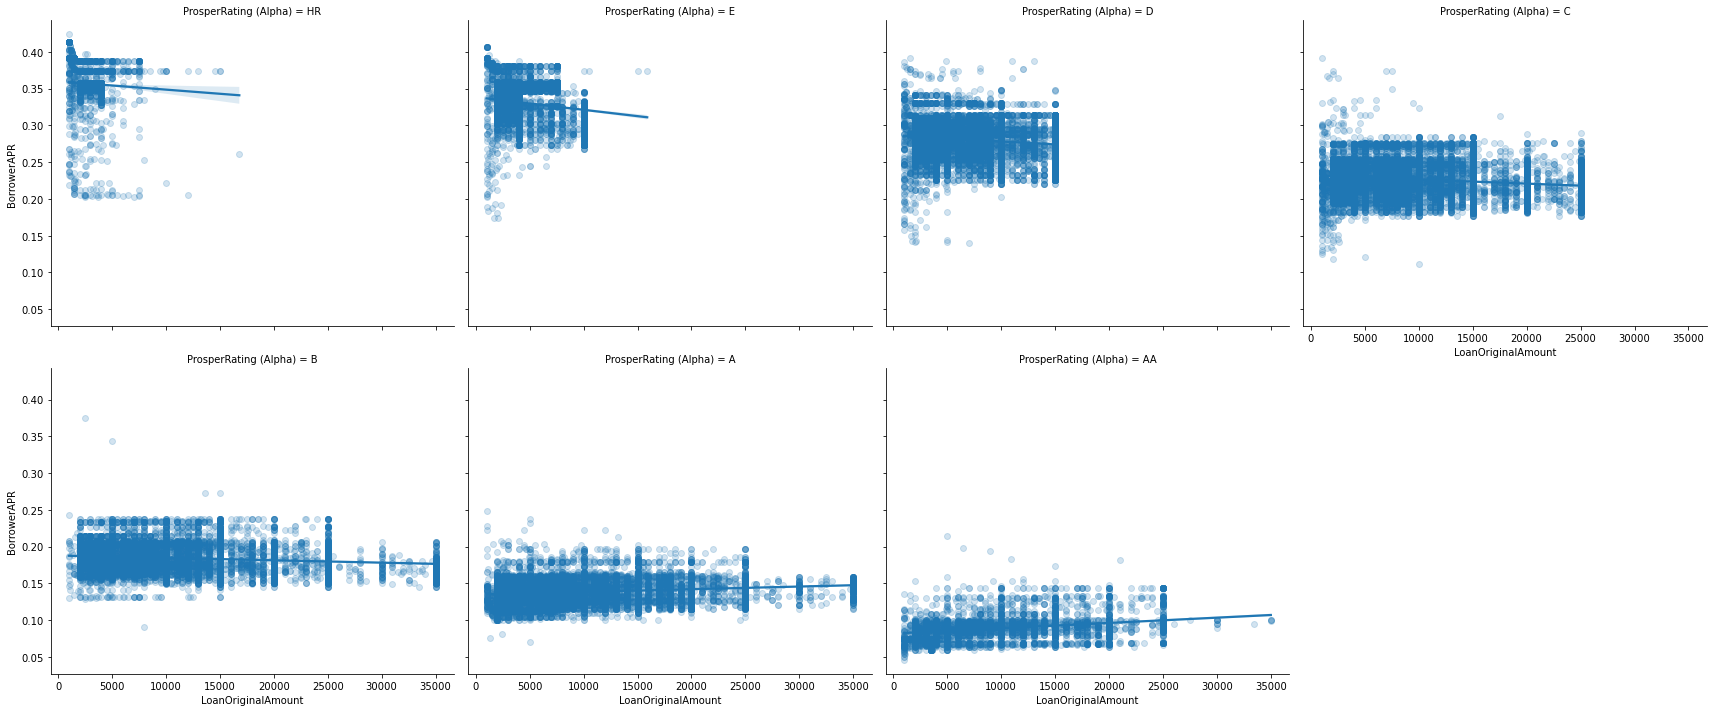

In [29]:
# Prosper Rating effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loan_data_cols, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.2});
g.add_legend();

Prosper Rating  have effect on  relationship of LoanOriginalAmount and BorrowerAPR
For borrowers with ratting AA, loan original amount increase as borrowerAPR increases

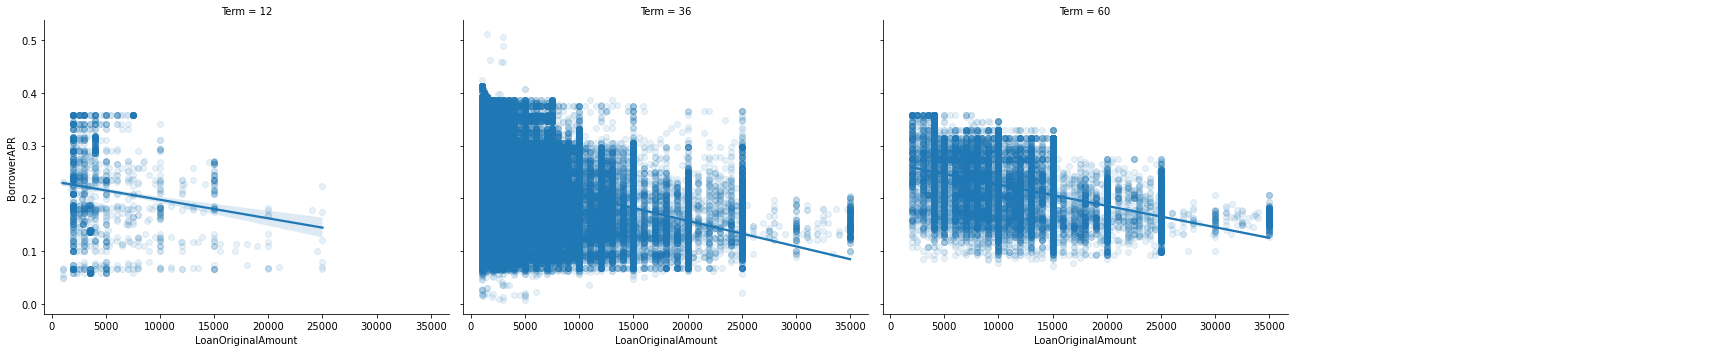

In [30]:
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loan_data_cols, aspect=1.2, height=5, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>  The multivariate exploration showed that the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings increased from HR to AA. 

>For the rating and term effects on loans,it shows that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.

### Were there any interesting or surprising interactions between features?

> The borrower APR and loan amount is negatively correlated when the Prosper ratings are from HR to B, but the correlation is turned to be positive when the ratings are A and AA. Another interesting thing is that the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the borrow term.